## Tensor

### Initializing a tensor

In [5]:
import torch
import numpy as np

data = [[1,2], [3,4]]
x_data = torch.tensor(data)
print(x_data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

shape =(2,3)
rand_tensor = torch.rand(shape)
ones_tensor =torch.ones(shape)
zeros_tensor= torch.zeros(shape)
print(rand_tensor)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[0.9754, 0.6291],
        [0.0207, 0.9325]])
tensor([[0.9859, 0.3070, 0.8260],
        [0.4130, 0.4827, 0.0803]])


### Attributes of a Tensor

In [7]:
tensor = torch.rand(3,4)
print("Shape of tensor: {}".format(tensor.shape))
print("Datatype of tensor: {}".format(tensor.dtype))
print("Device tensor is stored on: {}".format(tensor.device))

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Device

In [9]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
else:
    print("cuda is not available!")
print("Device tensor is stored on: {}".format(tensor.device))

device = 0
if torch.cuda.is_available():
    tensor = tensor.to('cuda:{}'.format(device))
print("Device tensor is stored on: {}".format(tensor.device))

tensor = tensor.cpu()
# tensor = tensor.to('cpu')
print("Device tensor is stored on: {}".format(tensor.device))


Device tensor is stored on: cuda:0
Device tensor is stored on: cuda:0
Device tensor is stored on: cpu


### Indexing, slicing and joining tensors

In [14]:
l = list(range(9))
tensor =torch.tensor(l).reshape((3,3))
print("Original 3*3 tenstor:")
print(tensor)

print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column: ', tensor[...,-1])

t1= torch.cat([tensor, tensor], dim=1)
t2 = torch.stack([tensor,tensor] , dim=1)

print("\nAfter concat:")
print(t1)
print("\nAfter stack:")
print(t2)

Original 3*3 tenstor:
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
First row:  tensor([0, 1, 2])
First column:  tensor([0, 3, 6])
Last column:  tensor([2, 5, 8])

After concat:
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5],
        [6, 7, 8, 6, 7, 8]])

After stack:
tensor([[[0, 1, 2],
         [0, 1, 2]],

        [[3, 4, 5],
         [3, 4, 5]],

        [[6, 7, 8],
         [6, 7, 8]]])


### Arithmetic operations

In [17]:
# the matrix multiplication
y1 = tensor @ tensor.T
y2= tensor.matmul(tensor.T)
y3 = torch.matmul(tensor,tensor.T)
print('-'*20)
print(y1)
print(y2)
print(y3)

# the element-wise product
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.mul(tensor,tensor)
print('-'*20)
print(z1)
print(z2)
print(z3)

# in-place operations
i1 = tensor.add(5)
i2 = tensor.mul(5)
print('-'*20)
print(i1)
print(i1)


--------------------
tensor([[  5,  14,  23],
        [ 14,  50,  86],
        [ 23,  86, 149]])
tensor([[  5,  14,  23],
        [ 14,  50,  86],
        [ 23,  86, 149]])
tensor([[  5,  14,  23],
        [ 14,  50,  86],
        [ 23,  86, 149]])
--------------------
tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])
tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])
tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])
--------------------
tensor([[ 5,  6,  7],
        [ 8,  9, 10],
        [11, 12, 13]])
tensor([[ 5,  6,  7],
        [ 8,  9, 10],
        [11, 12, 13]])


In [ ]:

### TASK-1
1. Generate a 2x4 matrix t1_a with values \([1, 2, ..., 8]\) in row-major order.
2. Generate a 4x2 matrix t1_b with values \([1,1,1, ..., 1]\).
3. Multiply the two matrices and outout the result as t1_c.

In [ ]:
t1_a = 
t1_b = 
t1_c = 

print(t1_a)
print(t1_b)
print(t1_c)

# Trainign a CNN Network

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import time
from tqdm import tqdm

### TASK-2 
Install tqdm

## Dataset

### Loading train set and test set

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32
data_path = "../data"
trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
 
testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
 

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
### Check some samples

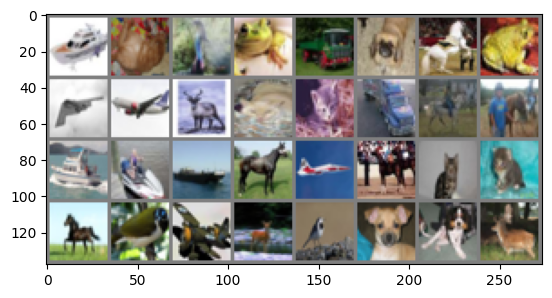

Labels:   ship ;   cat ;  bird ;  frog ; truck ;   dog ; horse ;  frog ; plane ; plane ;  deer ;   cat ;   cat ; truck ; horse ; horse ;  ship ;  ship ;  ship ; horse ; plane ; horse ;   cat ;   cat ; horse ;  bird ; plane ;  deer ;  bird ;   dog ;   dog ;  deer ;


In [30]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
 
imshow(torchvision.utils.make_grid(images))
# print labels
print('Labels: ', ' '.join('%5s ;' % classes[labels[j]] for j in range(batch_size)))

## Neural Network

###  Module

In [31]:
# Define a convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.relu1 = nn.ReLU()

        self.fc1 = nn.Linear(16 * 8 * 8, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)

        x = self.relu1(x)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
### Init the Net and check the model parameters 

In [ ]:
model = Net()
for name, param in model.named_parameters():
    print(name, param.size())

### test_kwargs

In [19]:
def test_kwargs(first, *args, **kwargs):
    print('Required argument:', first)
    print(type(args))
    print(type(kwargs))
    print('-'*24)
    for v in args:print('0ptional argument(args): ', v)
    print('-'*24)
    for k,v in kwargs.items():
        print('0ptional argument %s(kwargs):%s'%(k, v))
                                                 
test_kwargs(1,2,3,4,k1=5,k2=6)

Required argument: 1
<class 'tuple'>
<class 'dict'>
------------------------
0ptional argument(args):  2
0ptional argument(args):  3
0ptional argument(args):  4
------------------------
0ptional argument k1(kwargs):5
0ptional argument k2(kwargs):6


### load pretrained models

In [21]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)

for name, param in resnet18.named_parameters():
    print(name, param.size())

/home/ubuntu/anaconda3/envs/llava/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/anaconda3/envs/llava/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:01<00:00, 24.4MB/s]


In [ ]:
## Training

### Loss function and optimizer

In [33]:
import torch.optim as optim

loss = nn.CrossEntropyLoss()
#optimizer = optim.SGD(self.parameters(),lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
### Training loop

In [35]:
device = 'cpu' # switch to cuda if cuda is available

epoch_num = 10
total_iter = len(trainset) / batch_size
for epoch in range(epoch_num):  # loop over the dataset multiple times
    timestart = time.time()

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device),labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        l = loss(outputs, labels)
        l.backward()
        optimizer.step()

        # print statistics
        running_loss += l.item()
        # print("i ",i)
        if i % 500 == 499:  # print every 500 mini-batches
            print('[epoch: %d / %d, iter: %d / %5d] loss: %.4f' %
                    (epoch, epoch_num, i, total_iter, running_loss / 500))
            running_loss = 0.0
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            print('Accuracy of the network on the %d tran images: %.3f %%' % (total,
                    100.0 * correct / total))
            total = 0
            correct = 0

    print('epoch %d cost %3f sec' %(epoch,time.time()-timestart))
 
print('Finished Training')

[epoch: 0 / 10, iter: 499 /  1562] loss: 1.6833
Accuracy of the network on the 32 tran images: 46.875 %
[epoch: 0 / 10, iter: 999 /  1562] loss: 1.6649
Accuracy of the network on the 32 tran images: 37.500 %
[epoch: 0 / 10, iter: 1499 /  1562] loss: 1.6125
Accuracy of the network on the 32 tran images: 37.500 %
epoch 0 cost 15.151324 sec
[epoch: 1 / 10, iter: 499 /  1562] loss: 1.5785
Accuracy of the network on the 32 tran images: 40.625 %
[epoch: 1 / 10, iter: 999 /  1562] loss: 1.5621
Accuracy of the network on the 32 tran images: 46.875 %
[epoch: 1 / 10, iter: 1499 /  1562] loss: 1.5325
Accuracy of the network on the 32 tran images: 56.250 %
epoch 1 cost 14.717234 sec
[epoch: 2 / 10, iter: 499 /  1562] loss: 1.5171
Accuracy of the network on the 32 tran images: 46.875 %
[epoch: 2 / 10, iter: 999 /  1562] loss: 1.4964
Accuracy of the network on the 32 tran images: 46.875 %
[epoch: 2 / 10, iter: 1499 /  1562] loss: 1.4901
Accuracy of the network on the 32 tran images: 34.375 %
epoch 2

## Save and load model

### Save model

In [36]:
path = "../weight/cnn_weight.tar"

torch.save({'epoch':epoch,
            'model_state_dict':model.state_dict(),
            'optimizer_state_dict':optimizer.state_dict(),
            'loss':loss
            },path)
print("Model saved to:", path)

### load model and Test

In [50]:
from tqdm import tqdm
checkpoint = torch.load(path) 
model.load_state_dict(checkpoint['model_state_dict'])
print("load weight from:", path)

def test(model, testloader, device='cpu'):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %.3f %%' % (
                100.0 * correct / total))

test(model, testloader)


load weight from: ../weight/cnn_weight.tar


100%|█████████████████████████████████████████████| 313/313 [00:01<00:00, 201.46it/s]

Accuracy of the network on the 10000 test images: 52.870 %


### TAST-3 
Add a batch normalization layer before relu1


### TASK-4
1. Add a 3x3 convolutional layer (`conv3`) with 64 channels after `pool2`.
2. Add a 2x2 MaxPooling layer after `conv3` (referred to as `pool3`).
3. Modify `fc1` to have 512 output channels.
4. Modify `fc2` to have 256 output channels.
5. Adjust other layers as necessary to accommodate the above changes.
